# Testing Model selection, for data in the Top 10-set

Previously we hade checked diffrent models on another dataset and concluded that XGBoost gave the best result.
Before completting the project, we wanted to check the data produced in the Top10-set against those same models to make sure that XGBoost was in fact the best model in this case also.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
dataset = pd.read_csv('top10andprice.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
dataset.head()

,TotRmsAbvGrd,YearBuilt,LandContour,BsmtFinSF1,GarageCars,1stFlrSF,TotalBsmtSF,2ndFlrSF,GrLivArea,OverallQual,Saleprice
0,8,2003,Lvl,706,2,856,856,854,1710,7,208500
1,6,1976,Lvl,978,2,1262,1262,0,1262,6,181500
2,6,2001,Lvl,486,2,920,920,866,1786,7,223500
3,7,1915,Lvl,216,3,961,756,756,1717,7,140000
4,9,2000,Lvl,655,3,1145,1145,1053,2198,8,250000


## Encoding categorical data

We can see below, that the column number 2 have categorical data and must be one hot encoded.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TotRmsAbvGrd  1460 non-null   int64 
 1   YearBuilt     1460 non-null   int64 
 2   LandContour   1460 non-null   object
 3   BsmtFinSF1    1460 non-null   int64 
 4   GarageCars    1460 non-null   int64 
 5   1stFlrSF      1460 non-null   int64 
 6   TotalBsmtSF   1460 non-null   int64 
 7   2ndFlrSF      1460 non-null   int64 
 8   GrLivArea     1460 non-null   int64 
 9   OverallQual   1460 non-null   int64 
 10  Saleprice     1460 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 125.6+ KB


### The onehot encoding of the columns

In [4]:
X = pd.get_dummies(X)
X.head(10)

,TotRmsAbvGrd,YearBuilt,BsmtFinSF1,GarageCars,1stFlrSF,TotalBsmtSF,2ndFlrSF,GrLivArea,OverallQual,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,8,2003,706,2,856,856,854,1710,7,0,0,0,1
1,6,1976,978,2,1262,1262,0,1262,6,0,0,0,1
2,6,2001,486,2,920,920,866,1786,7,0,0,0,1
3,7,1915,216,3,961,756,756,1717,7,0,0,0,1
4,9,2000,655,3,1145,1145,1053,2198,8,0,0,0,1
5,5,1993,732,2,796,796,566,1362,5,0,0,0,1
6,7,2004,1369,2,1694,1686,0,1694,8,0,0,0,1
7,7,1973,859,2,1107,1107,983,2090,7,0,0,0,1
8,8,1931,0,2,1022,952,752,1774,7,0,0,0,1
9,5,1939,851,1,1077,991,0,1077,5,0,0,0,1


In [5]:
X = X.values
y = y.values

### The result of each model will be added to this list

In [6]:
results_r2 = []

Once we have our array, we can start using the various methods/models.

# Model: XGBoost regression

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the XGBoost regression model 

In [8]:
from xgboost import XGBRegressor
#seed = 0 is default
regressor = XGBRegressor(seed = 0)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[268616.91 200624.  ]
 [134145.41 133000.  ]
 [115241.47 110000.  ]
 [224192.3  192000.  ]
 [ 84624.42  88000.  ]
 [114255.57  85000.  ]
 [273759.91 282922.  ]
 [120748.48 141000.  ]
 [647299.62 745000.  ]
 [151545.2  148800.  ]
 [207496.84 208900.  ]
 [149168.36 136905.  ]
 [225470.17 225000.  ]
 [129125.52 123000.  ]
 [143378.91 119200.  ]
 [150941.78 145000.  ]
 [207925.55 190000.  ]
 [116103.92 123600.  ]
 [129082.12 149350.  ]
 [188426.08 155000.  ]
 [136327.08 166000.  ]
 [145646.66 144500.  ]
 [104045.16 110000.  ]
 [170363.91 174000.  ]
 [171670.39 185000.  ]
 [146942.5  168000.  ]
 [180437.31 177500.  ]
 [ 74575.54  84500.  ]
 [361920.38 320000.  ]
 [121242.62 118500.  ]
 [124880.2  110000.  ]
 [187729.48 213000.  ]
 [141876.33 156000.  ]
 [290945.88 250000.  ]
 [256832.98 372500.  ]
 [171180.47 175000.  ]
 [285192.47 277500.  ]
 [138615.77 112500.  ]
 [216736.06 263000.  ]
 [281292.03 325000.  ]
 [257299.08 243000.  ]
 [136754.2  130000.  ]
 [180403.56 164990.  ]
 [263293.62

## Evaluating the Model Performance

In [10]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))


0.8797663434499159


# Model: Random forest regression

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the random forest regression model 

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

## Predicting the Test set results

In [13]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[250330.4  200624.  ]
 [144424.   133000.  ]
 [123221.78 110000.  ]
 [223568.3  192000.  ]
 [ 92134.    88000.  ]
 [113482.95  85000.  ]
 [262553.27 282922.  ]
 [118667.87 141000.  ]
 [637061.5  745000.  ]
 [147315.38 148800.  ]
 [202600.73 208900.  ]
 [140656.9  136905.  ]
 [228506.1  225000.  ]
 [126063.83 123000.  ]
 [133816.6  119200.  ]
 [156420.5  145000.  ]
 [211609.5  190000.  ]
 [117468.58 123600.  ]
 [124235.   149350.  ]
 [186212.   155000.  ]
 [138551.5  166000.  ]
 [145525.57 144500.  ]
 [118810.36 110000.  ]
 [174003.24 174000.  ]
 [173624.9  185000.  ]
 [210908.5  168000.  ]
 [175911.96 177500.  ]
 [ 81825.    84500.  ]
 [317774.19 320000.  ]
 [122785.   118500.  ]
 [139419.   110000.  ]
 [196980.65 213000.  ]
 [142571.92 156000.  ]
 [281350.98 250000.  ]
 [287392.21 372500.  ]
 [170889.1  175000.  ]
 [287732.84 277500.  ]
 [124552.5  112500.  ]
 [224139.88 263000.  ]
 [294042.34 325000.  ]
 [229734.7  243000.  ]
 [124604.57 130000.  ]
 [183211.98 164990.  ]
 [280046.45

## Evaluating the Model Performance

In [14]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.8590365954128754


# Model: Decision tree regression

## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the Decision Tree Regression model 

In [16]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state= 0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [17]:
y_pred = tree.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[210000. 200624.]
 [128000. 133000.]
 [130500. 110000.]
 [205000. 192000.]
 [ 94500.  88000.]
 [115000.  85000.]
 [245000. 282922.]
 [127500. 141000.]
 [755000. 745000.]
 [116900. 148800.]
 [202500. 208900.]
 [135000. 136905.]
 [242000. 225000.]
 [125500. 123000.]
 [119000. 119200.]
 [153000. 145000.]
 [225000. 190000.]
 [ 94750. 123600.]
 [140000. 149350.]
 [311500. 155000.]
 [152000. 166000.]
 [146000. 144500.]
 [115000. 110000.]
 [178000. 174000.]
 [183200. 185000.]
 [215000. 168000.]
 [172500. 177500.]
 [ 75500.  84500.]
 [325000. 320000.]
 [120000. 118500.]
 [161500. 110000.]
 [197900. 213000.]
 [143750. 156000.]
 [290000. 250000.]
 [253293. 372500.]
 [179900. 175000.]
 [337500. 277500.]
 [115000. 112500.]
 [222500. 263000.]
 [302000. 325000.]
 [237500. 243000.]
 [105000. 130000.]
 [195400. 164990.]
 [318000. 280000.]
 [302000. 403000.]
 [143900. 119000.]
 [135000. 125000.]
 [125000. 128200.]
 [165150. 172500.]
 [ 84000.  84900.]
 [426000. 412500.]
 [149900. 156000.]
 [180000. 16

## Evaluating the Model Performance

In [18]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.7177875264542323


# Model: Multiple linear regression

## Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Training the Multiple linear regression 

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [21]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[285484.21 200624.  ]
 [156522.56 133000.  ]
 [104662.71 110000.  ]
 [231346.68 192000.  ]
 [118724.2   88000.  ]
 [ 99499.87  85000.  ]
 [263341.46 282922.  ]
 [125596.94 141000.  ]
 [520714.32 745000.  ]
 [165045.62 148800.  ]
 [197529.34 208900.  ]
 [178866.55 136905.  ]
 [238212.17 225000.  ]
 [118225.01 123000.  ]
 [137247.97 119200.  ]
 [154400.92 145000.  ]
 [227814.41 190000.  ]
 [ 97348.93 123600.  ]
 [126160.31 149350.  ]
 [182823.66 155000.  ]
 [145553.02 166000.  ]
 [151711.15 144500.  ]
 [ 97430.86 110000.  ]
 [162126.49 174000.  ]
 [196792.66 185000.  ]
 [199198.22 168000.  ]
 [179671.39 177500.  ]
 [ 47998.89  84500.  ]
 [311257.13 320000.  ]
 [119936.7  118500.  ]
 [189818.71 110000.  ]
 [214789.91 213000.  ]
 [153070.04 156000.  ]
 [284815.34 250000.  ]
 [288188.72 372500.  ]
 [208181.08 175000.  ]
 [284892.62 277500.  ]
 [113142.16 112500.  ]
 [224372.48 263000.  ]
 [314332.76 325000.  ]
 [223392.78 243000.  ]
 [127887.54 130000.  ]
 [194895.14 164990.  ]
 [296569.75

## Evaluating the Model Performance

In [22]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.6484322624685881


# Model: Polynomial regression

## Splitting the dataset into the Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

## Training the Polynomial Regression model

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree= 2)
X_poly_train = poly_reg.fit_transform(X_train)

linear_poly = LinearRegression()
linear_poly.fit(X_poly_train,y_train)

LinearRegression()

## Predicting the Test set results

In [25]:
#X_poly_test = poly_reg.fit_transform(X_test)
X_poly_test = poly_reg.transform(X_test)
y_pred = linear_poly.predict(X_poly_test)

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[236735.95 200624.  ]
 [150676.99 133000.  ]
 [ 95517.17 110000.  ]
 [229706.47 192000.  ]
 [106120.47  88000.  ]
 [114719.73  85000.  ]
 [264398.94 282922.  ]
 [125237.38 141000.  ]
 [656486.4  745000.  ]
 [134290.55 148800.  ]
 [184218.92 208900.  ]
 [162096.44 136905.  ]
 [237112.15 225000.  ]
 [124181.72 123000.  ]
 [131251.   119200.  ]
 [145428.22 145000.  ]
 [218510.52 190000.  ]
 [112112.42 123600.  ]
 [128295.55 149350.  ]
 [171747.21 155000.  ]
 [139600.36 166000.  ]
 [144208.66 144500.  ]
 [122705.6  110000.  ]
 [157182.94 174000.  ]
 [187906.51 185000.  ]
 [179382.38 168000.  ]
 [175627.1  177500.  ]
 [ 86356.22  84500.  ]
 [341062.28 320000.  ]
 [120892.61 118500.  ]
 [154527.4  110000.  ]
 [203117.05 213000.  ]
 [145950.19 156000.  ]
 [297970.12 250000.  ]
 [297317.5  372500.  ]
 [180627.66 175000.  ]
 [284491.15 277500.  ]
 [115815.15 112500.  ]
 [231745.47 263000.  ]
 [335603.34 325000.  ]
 [202726.64 243000.  ]
 [137741.18 130000.  ]
 [184676.23 164990.  ]
 [310109.4 

## Evaluating the Model Performance

In [26]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))


0.8479678245046699


# Model: Support vector regression

In [27]:
y = y.reshape(-1,1)

## Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

## Feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

## Training the SVR regression model 

In [30]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(X_train, y_train)

SVR()

## Predicting the Test set results

In [31]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[220166.5  200624.  ]
 [145134.   133000.  ]
 [104886.01 110000.  ]
 [216384.4  192000.  ]
 [101236.13  88000.  ]
 [111739.41  85000.  ]
 [253534.58 282922.  ]
 [126899.54 141000.  ]
 [316755.82 745000.  ]
 [149598.16 148800.  ]
 [185060.45 208900.  ]
 [161846.89 136905.  ]
 [233374.03 225000.  ]
 [128388.08 123000.  ]
 [136261.8  119200.  ]
 [153344.52 145000.  ]
 [216392.19 190000.  ]
 [118453.57 123600.  ]
 [135670.02 149350.  ]
 [165848.36 155000.  ]
 [139704.94 166000.  ]
 [143522.29 144500.  ]
 [100713.48 110000.  ]
 [162346.01 174000.  ]
 [186222.1  185000.  ]
 [176796.12 168000.  ]
 [181026.95 177500.  ]
 [ 82734.19  84500.  ]
 [327490.86 320000.  ]
 [122010.91 118500.  ]
 [153443.06 110000.  ]
 [204390.73 213000.  ]
 [143928.25 156000.  ]
 [298945.61 250000.  ]
 [283338.24 372500.  ]
 [176704.94 175000.  ]
 [293274.09 277500.  ]
 [128929.01 112500.  ]
 [223853.12 263000.  ]
 [333016.8  325000.  ]
 [212018.33 243000.  ]
 [112012.67 130000.  ]
 [182832.88 164990.  ]
 [311295.58

## Evaluating the Model Performance

In [32]:
from sklearn.metrics import r2_score
results_r2.append(r2_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.7409172404939695


## Presenting the result

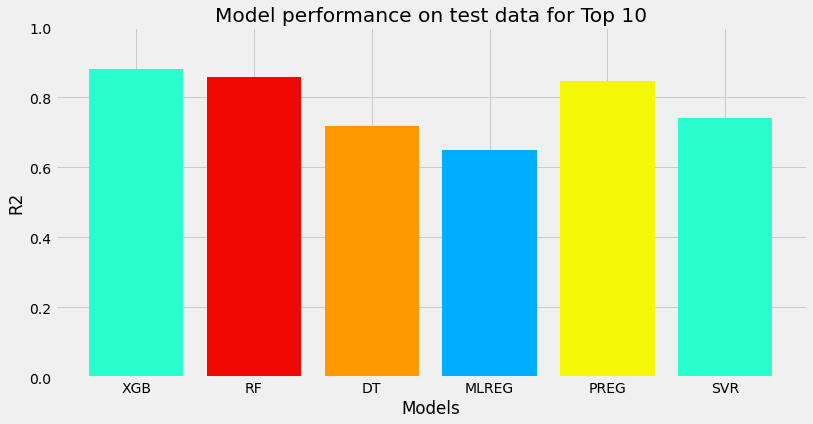

In [36]:
import matplotlib.cm as cm
from numpy.random import rand

# get a color map
cmap = cm.get_cmap('jet')
# 5 nbrs 0 - 1 in array
my_colors = rand(5)

plt.style.use('fivethirtyeight')
plt.figure(figsize =(12,6))

models = np.array(["XGB", "RF", "DT", "MLREG", "PREG","SVR"])

plt.bar(models, results_r2, color = cmap(my_colors))
plt.xlabel("Models")
plt.ylabel("R2")
plt.title("Model performance on test data for Top 10")
plt.ylim(0.0, 1)
plt.show()

XGBoost gives us the best result in this case also.